![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
5,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST
6,221515929,2022-10-10,2020-04-01,1200,N Hollywood,THEFT OF IDENTITY,33,M,W,NaN,Invest Cont,5700 CARTWRIGHT AV
7,231906599,2023-03-03,2020-01-14,1335,Mission,THEFT OF IDENTITY,35,M,O,NaN,Invest Cont,14500 WILLOWGREEN LN
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
9,231506571,2023-03-03,2020-07-15,1700,N Hollywood,OTHER MISCELLANEOUS CRIME,21,F,W,VERBAL THREAT,Invest Cont,12300 EMELITA ST


Explore the crimes.csv dataset and use your findings to answer the following questions:

* Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.
* Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.
* Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

## Data Wrangling

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


* Further Analysis is required for `Vict Sex`, `Vict Descent` and `Weapon Desc`.
* `DATE OCC` and `TIME OCC` could be merged in a single variable.
* `TIME OCC` requires binning into 'Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night'
* The `LOCATION` column can be split into two different columns `Location_number` and `Street_name`

In [3]:
df.describe()

,DR_NO,Date Rptd,DATE OCC,Vict Age
count,1.857150e+05,185715,185715,185715.000000
mean,2.255781e+08,2022-12-12 01:50:25.325902848,2022-11-27 19:04:55.711170560,39.999257
min,2.009072e+08,2022-06-01 00:00:00,2020-01-01 00:00:00,2.000000
25%,2.210108e+08,2022-09-04 00:00:00,2022-08-25 00:00:00,28.000000
50%,2.220114e+08,2022-12-10 00:00:00,2022-12-02 00:00:00,37.000000
75%,2.310044e+08,2023-03-20 00:00:00,2023-03-12 00:00:00,50.000000
max,2.399097e+08,2023-07-03 00:00:00,2023-07-03 00:00:00,99.000000
std,5.017438e+06,NaN,NaN,15.450227


In [4]:
def four2time(num):
    ''' four2time(num)
    variable 'num' should be a string of four elements e.g. '0000'
    which will be transformed to a string with the format:
    "00:00:00"
    '''
    new_str=num[0:2]+':'+num[2:4]+':00'
    return new_str
def date2str(DateTime):
    ''' date2str(DateTime)
    Gets the DateTime of type datetime and
    returns only the string with the date.
    '''
    
    new_date=str(DateTime.iloc[0])[:10]+' '+four2time(DateTime.iloc[1])
    return new_date

In [5]:
df['Status Desc'].value_counts()

Status Desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64

In [6]:
df['Vict Descent'].value_counts(dropna=False)

Vict Descent
H      74128
W      44985
B      34931
O      16331
A       5519
X       4548
K       1389
F       1228
C       1210
J        433
V        327
I        322
Z        145
P         83
U         54
D         21
L         20
S         16
G         14
NaN       10
-          1
Name: count, dtype: int64

In [7]:
df['AREA NAME'].value_counts(dropna=False)

AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: count, dtype: int64

In [8]:
df['HOUR OCC']=df['TIME OCC'].str[:2].astype('int')
df['HOUR OCC'].value_counts().max()

13663

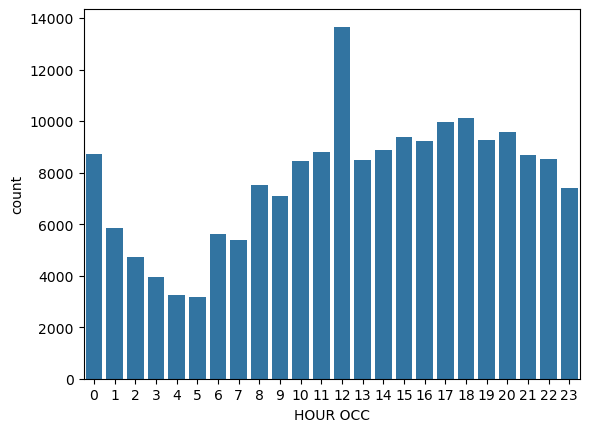

In [9]:
plt.clf()
g=sns.countplot(x='HOUR OCC',data=df           )
g.set_xticks(range(0,24)) 
# g.set_xticklabels(range(0,25),rotation=90 )
plt.show()

In [10]:
peak_crime_hour=12

In [11]:
labels_hr=['Night','Morning','Afternoon','Evening','Night']
time_ranges=[0,4,11,16,21,24]
df['time_zone']=pd.cut(df['HOUR OCC'],bins=time_ranges,labels=labels_hr,ordered=False)

df['time_zone']=pd.Categorical(df['time_zone'],categories=['Morning','Afternoon','Evening','Night'],ordered=True)

In [12]:
df['time_zone'].value_counts().sort_index()

time_zone
Morning      46037
Afternoon    49626
Evening      47631
Night        33693
Name: count, dtype: int64

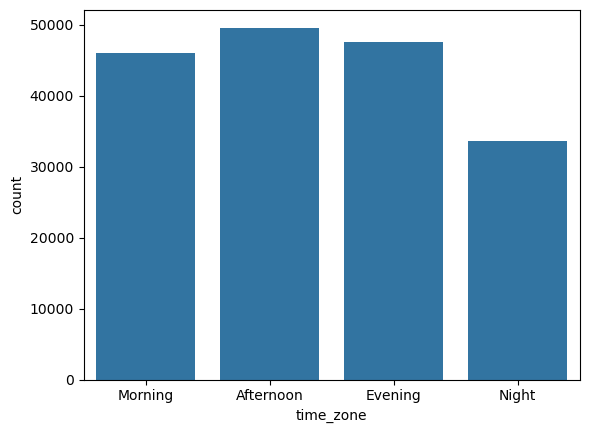

In [13]:
plt.clf()
g=sns.countplot(x='time_zone',data=df           )

plt.show()

In [14]:
crime_zones=df[df['time_zone']=='Night'].groupby(['AREA NAME'])['HOUR OCC'].sum().sort_values(ascending=False)
peak_night_crime_location=crime_zones.index[0]

In [15]:
df_age=df[['Vict Age']]
age_groups=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64",  "65+"]
age_ranges=[0, 17,      25,      34,      44,      54,      64,    np.inf]

df['Age_ranges']=pd.cut(df['Vict Age'],
                           bins=age_ranges,
                           labels=age_groups)

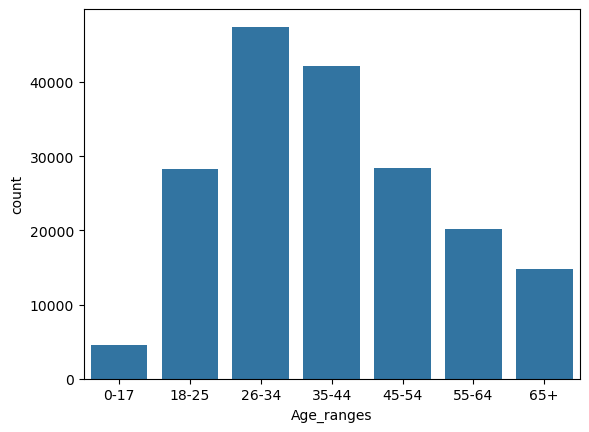

In [16]:
plt.clf()
sns.countplot(data=df,x='Age_ranges')
plt.show()

In [17]:
victim_ages=df['Age_ranges'].value_counts()

In [18]:
print(f'Peak crime hour: {peak_crime_hour}:00')
print(f'Peak night crime location: {peak_night_crime_location}')
print(f'Victim ages: {victim_ages}')

Peak crime hour: 12:00
Peak night crime location: Central
Victim ages: Age_ranges
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
 12  HOUR OCC      185715 non-null  int32         
 13  time_zone     176987 non-null  category      
 14  Age_ranges    185715 non-null  category      
dtypes: category(2), d